In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
vacancy = pd.read_csv('vacancy.csv.zip')

In [36]:
vacancy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4002 entries, 0 to 4001
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              4002 non-null   int64 
 1   created_at      4002 non-null   object
 2   updated_at      4002 non-null   object
 3   vacid           4002 non-null   int64 
 4   vactitle        4002 non-null   object
 5   vacdescription  3886 non-null   object
 6   vacdate         4000 non-null   object
 7   vacstatus       4002 non-null   object
 8   vaclink         4002 non-null   object
 9   vachtml         4002 non-null   object
dtypes: int64(2), object(8)
memory usage: 312.8+ KB


In [37]:
vacancy.describe()

id         vacid
count    4002.000000  4.002000e+03
mean   384982.500000  1.373042e+06
std      1155.422217  3.460592e+05
min    382982.000000  2.142400e+04
25%    383982.250000  1.452172e+06
50%    384982.500000  1.511048e+06
75%    385982.750000  1.535519e+06
max    386983.000000  1.604524e+06

In [38]:
vacancy.shape

(4002, 10)

In [21]:
vacancy.columns = ['id',
                   'created_at',
                   'updated_at',
                   'vacid',
                   'vactitle',
                   'vacdescription',
                   'vacdate',
                   'vacstatus',
                   'vaclink',
                   'vachtml']

In [27]:
vacancy.rename(columns = {'vacid__': 'vacid'}, inplace=True)

In [30]:
vacancy = vacancy.drop(['updated_at'], axis=1)

In [43]:
%%time
del(vacancy['updated_at'])

CPU times: user 629 µs, sys: 1.6 ms, total: 2.23 ms
Wall time: 2.22 ms


In [41]:
%%time
vacancy = vacancy.drop(['updated_at'], axis=1)

CPU times: user 7.29 ms, sys: 35.8 ms, total: 43.1 ms
Wall time: 48 ms


In [51]:
a = vacancy.vactitle.value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

In [22]:
# Посмотреть первые строчки
vacancy.head(3)

id                  created_at                  updated_at    vacid  \
0  383479  2021-03-14 09:39:21.854462  2021-03-14 09:39:21.854584  1474941   
1  383480  2021-03-14 09:39:21.854462  2021-03-14 09:39:21.854584  1476154   
2  383481  2021-03-14 09:39:21.854462  2021-03-14 09:39:21.854584  1479834   

                                            vactitle  \
0     Senior java-разработчик (в команду Онбординга)   
1                      Дизайнер мобильных приложений   
2  Старший специалист отдела мониторинга залогово...   

                                      vacdescription     vacdate vacstatus  \
0   Работа у нас — это:команда профессионалов, го...  2021-03-15       new   
1  Мы ищем  дизайнера в нашу дружную команду Сбер...  2021-03-15       new   
2    Условия: ● официальное трудоустройство;● 5-т...  2021-03-15       new   

                                             vaclink  \
0  https://my.sbertalents.ru/#/job-requisition/14...   
1  https://my.sbertalents.ru/#/job-requisition/14...   
2  https://my.sbertalents.ru/#/job-requisition/14...   

                                             vachtml  
0  {"title": "Senior java-\u0440\u0430\u0437\u044...  
1  {"title": "\u0414\u0438\u0437\u0430\u0439\u043...  
2  {"title": "\u0421\u0442\u0430\u0440\u0448\u043...

In [55]:
# убрать лишнее
vacancy = vacancy.drop(['vachtml','created_at'], axis=1)

In [57]:
# посчитать по датам количество вакансий
vacancy.groupby('vacdate')['vacid'].count().sum()

4000

In [73]:
# t1 = vacancy.vacdate.notna()
# t2 = vacancy.vactitle.str.lower().str.startswith('senior')
t3 = vacancy.vactitle.str.lower().str.contains('python| r')

vacancy[
    t1 &
    t2 &
    t3
]

id    vacid                                           vactitle  \
92    383571  1519617                    QA Automation Engineer (Python)   
96    383575  1524619                 Python разработчик (команда "ИСУ")   
557   384036  1542237                   Python backend developer (TagMe)   
589   384068  1566443                                 Аналитик Retail FX   
617   384096  1501006                                 Python разработчик   
720   384199  1528569                        Python-разработчик (Django)   
817   384296  1541968  Python-разработчик. Команда виртуальных ассист...   
875   384354  1505839                      Team Lead - в команду R&D NLP   
1202  384681  1411826                     Web-разработчик (React, Redux)   
1230  384709  1532790                              Data analyst (Python)   
1483  384962  1530552       front-end разработчик React + Redux (middle)   
1586  385065  1389813            Prudential risk/RWA methodology manager   
1657  385136  1157637                                   Python developer   
1803  385282  1501051                                 Python-разработчик   
1828  385307  1534592                      Back-end разработчик (Python)   
1876  385355  1531671                               Python-junior/стажёр   
1919  385398  1474727              Senior Frontend Developer (Js, React)   
1948  385427  1531831                                 Python-разработчик   
2159  385638  1169644                                 Python разработчик   
2297  385776  1396531           Python developer (Виртуальный ассистент)   
2299  385778  1477623                                   Python developer   
2440  385919  1500427  Python developer (Виртуальный ассистент, напра...   
2449  385928  1520814                                 Python разработчик   
2638  386117  1474936                          Senior Python разработчик   
2733  386212  1517400              Middle frontend-разработчик JS, React   
2808  386287  1511309         Senior UX researcher (Web Sberbank Online)   
2827  386306  1511296                       Разработчик ИСУ (Python/SQL)   
2927  386406  1500839           Junior Risk Quant (Quantitative Analyst)   
3041  386520  1491608                               DevOps Python под DS   
3124  386603  1474781            JavaScript/Python developer SberDevices   
3174  386653   710137                   Python разработчик (SberDevices)   
3291  386770  1488950                                    Разработчик RPA   
3400  386879  1477344  Frontend Developer/ React (Сервис потоковой за...   
3448  386927  1057341                                 Python-разработчик   
3457  386936  1116054        Ведущий Backend-разработчик (Python/Django)   
3469  386948  1169703                           Сценарист/ Python Junior   
3520  382997  1466896                                 Разработчик Python   
3622  383099  1509953                                             Python   
3689  383166  1602558                       Site Reliability Engineering   
3712  383189  1501761         Frontend Developer (JS, React, TypeScript)   
3796  383273  1003384  Старший аудитор (с навыком программирования на...   
3882  383359  1593588                            Наставник по Python/SQL   

                                         vacdescription    vacdate vacstatus  \
92    Cбер продолжает реализовывать масштабный проек... 2021-03-12       new   
96    Трайб «ИСУ» набирает команду для разработки пр... 2021-03-15       new   
557   Чем предстоит заниматься:Проектировать и разра... 2021-03-10       new   
589   Мы предлагаем:оформление согласно трудовому ко... 2021-03-10       new   
617    Мы предлагаем: пятидневную рабочую неделю, оф... 2021-03-10       new   
720   Трайб «Интеллектуальная система управления» фо... 2021-03-09       new   
817   Ежедневно десятки миллионов клиентов пользуютс... 2021-03-05       new   
875   Условия:современный IT-офис вблизи м. Кутузовс... 2021-03-04       new   
1202  Работа у нас — 

In [56]:
vacancy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4002 entries, 0 to 4001
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              4002 non-null   int64 
 1   vacid           4002 non-null   int64 
 2   vactitle        4002 non-null   object
 3   vacdescription  3886 non-null   object
 4   vacdate         4000 non-null   object
 5   vacstatus       4002 non-null   object
 6   vaclink         4002 non-null   object
dtypes: int64(2), object(5)
memory usage: 219.0+ KB


In [71]:
# перевести даты в формат datetime
vacancy.vacdate = pd.to_datetime(vacancy.vacdate)

In [72]:
# vacancy.vacdate.dtype

dtype('<M8[ns]')

In [94]:
# перевести даты в индекс и построить график
vacancy = vacancy.set_index('vacdate')

KeyError: "None of ['vacdate'] are in the columns"

In [91]:
vacancy = vacancy.reset_index()

In [79]:
def myfunc():
    pass

In [80]:
def myfunc(x):
    return x**2

In [81]:
myfunc(5)

25

In [82]:
lambda x: x**2

In [83]:
myfunc_l(5)

25

In [98]:
vacancy = vacancy.reset_index()

In [86]:
vacancy.vacdate.dtype

dtype('<M8[ns]')

In [102]:
def get_weekday(x):
    return x.weekday()

In [78]:
vacancy.vacdate.apply(lambda x: x.weekday)

AttributeError: 'DatetimeIndex' object has no attribute 'apply'

In [ ]:
vacancy.vacdate.apply(lambda x: get_weekday(x))

In [105]:
vacancy[vacancy.vacdate.isna()]

vacdate      id    vacid  \
535     NaT  384014  1504712   
729     NaT  384208  1539459   

                                              vactitle  \
535        Системный аналитик (платформа рекомендаций)   
729  Главный инженер по сопровождению Департамента ...   

                                        vacdescription vacstatus  \
535   Полный рабочий день, свободный графикДостойна...       new   
729  Условия Достойная зработная плата (оклад + пре...       new   

                                               vaclink  
535  https://my.sbertalents.ru/#/job-requisition/15...  
729  https://my.sbertalents.ru/#/job-requisition/15...

In [106]:
vacancy['weekday'] = vacancy['vacdate'].apply(lambda x: x.weekday())

In [107]:
vacancy[vacancy.vacdate.isna()]

vacdate      id    vacid  \
535     NaT  384014  1504712   
729     NaT  384208  1539459   

                                              vactitle  \
535        Системный аналитик (платформа рекомендаций)   
729  Главный инженер по сопровождению Департамента ...   

                                        vacdescription vacstatus  \
535   Полный рабочий день, свободный графикДостойна...       new   
729  Условия Достойная зработная плата (оклад + пре...       new   

                                               vaclink  weekday  
535  https://my.sbertalents.ru/#/job-requisition/15...      NaN  
729  https://my.sbertalents.ru/#/job-requisition/15...      NaN

In [109]:
# vacancy.dropna()

In [114]:
vacancy = vacancy.sort_values(by=['vacdate','vactitle'], ascending=[True,True])

In [118]:
# найти профессии с самым большим количеством вакансий и построить по ним график
vacs = vacancy.groupby('vactitle')['vacid'].count().reset_index()


In [117]:
vacancy.groupby('vactitle')['vacid'].count().sort_values(ascending=False)

vactitle
Мобильный менеджер по продажам                                  229
Старший менеджер по обслуживанию                                172
Специалист по прямым продажам                                   164
Менеджер по продажам                                             86
Системный аналитик                                               62
                                                               ... 
Аналитик витрин данных                                            1
Аналитик в штаб блока "Розничный бизнес"                          1
Аналитик в команду исследования клиентской удовлетворенности      1
Аналитик в команду «Бюджетирование»                               1
специалист по прямым продажам                                     1
Name: vacid, Length: 2167, dtype: int64

In [120]:
vacs = vacs.sort_values(by='vacid',ascending=False)

In [125]:
vacs.nlargest(5, 'vacid')

vactitle  vacid
1371    Мобильный менеджер по продажам    229
1919  Старший менеджер по обслуживанию    172
1772     Специалист по прямым продажам    164
1305              Менеджер по продажам     86
1665                Системный аналитик     62

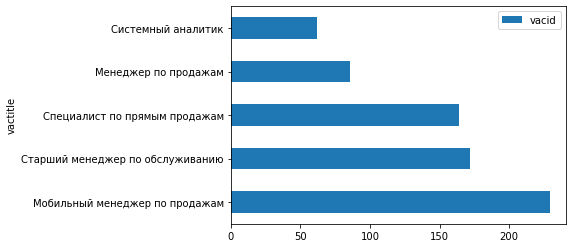

In [129]:
vacs.nlargest(5, 'vacid').set_index('vactitle').plot(kind='barh');

In [9]:
# Найти вакансии аналитика
s = 'аналитик'.lower()
python_s = 'python'

In [10]:
t1 = vacancy.vactitle.str.lower().str.contains(s)
t2 = vacancy.vacdescription.str.lower().str.contains(python_s)
vacancy[t1 & t2].shape

(57, 6)

In [142]:
cols = ['weekday']
vacancy.loc[vacancy.vactitle.str.lower().str.contains('python'), cols] = 1

In [148]:
vac = vacancy[vacancy.vactitle.str.lower().str.contains('python')].copy()

In [149]:
vac['weekday'] = 2

In [14]:
# отфильтровать вакансии по дате
vacancy[t1 | t2].reset_index().sort_values(by='vacdate', ascending=False).head()

vacdate      id    vacid  \
763 2021-03-17  382996  1455842   
777 2021-03-17  383093  1435646   
790 2021-03-17  383167  1602561   
789 2021-03-17  383166  1602558   
788 2021-03-17  383155  1599185   

                                              vactitle  \
763  Старший инженер отдела информационной безопасн...   
777                     Тестировщик (java разработчик)   
790                                             DevOps   
789                       Site Reliability Engineering   
788                Системный аналитик в Сбер Аналитику   

                                        vacdescription vacstatus  \
763  Условия: работа в крупнейшем банке России;труд...       new   
777  Сбер — больше чем банк, это вселенная полезных...       new   
790  Cбербанк продолжает масштабный проект по созда...       new   
789  Cбер продолжает масштабный проект по созданию ...       new   
788   Условия:∙ Офис метро Нарвская, пр. Старо-Пете...       new   

                                               vaclink  
763  https://my.sbertalents.ru/#/job-requisition/14...  
777  https://my.sbertalents.ru/#/job-requisition/14...  
790  https://my.sbertalents.ru/#/job-requisition/16...  
789  https://my.sbertalents.ru/#/job-requisition/16...  
788  https://my.sbertalents.ru/#/job-requisition/15...

In [2]:
from parser import VacancyParser

In [11]:
vp = parser.VacancyParser()

In [10]:
import importlib
import parser
importlib.reload(parser)

<module 'parser' from '/Users/lev4/Projects/reboot_october/new_course/Lesson2/parser.py'>

In [12]:
vacs = vp.get_vacancies()

  0%|          | 0/100 [00:00<?, ?it/s]

INFO:root:Скачиваю вакансии. Страница 0 в выдаче по 100


KeyError: 'content'